In [17]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.metrics as metrics

dropout_rate = 0.1

model = Sequential()
model.add(Dense(units=200, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(units=150))
model.add(Activation('relu'))
model.add(Dense(units=50))
model.add(Activation('relu'))
model.add(Dense(units=30))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.1, decay=0.5/n_batch, nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [19]:
from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

In [30]:
history = model.fit(X_train, y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 5s - loss: 14.5058 - categorical_accuracy: 0.1000 - top3_acc: 0.9996     
Epoch 2/5
60000/60000 [==============================] - 5s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000     
Epoch 4/5
60000/60000 [==============================] - 5s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000     
Epoch 5/5
60000/60000 [==============================] - 5s - loss: 14.5063 - categorical_accuracy: 0.1000 - top3_acc: 1.0000     


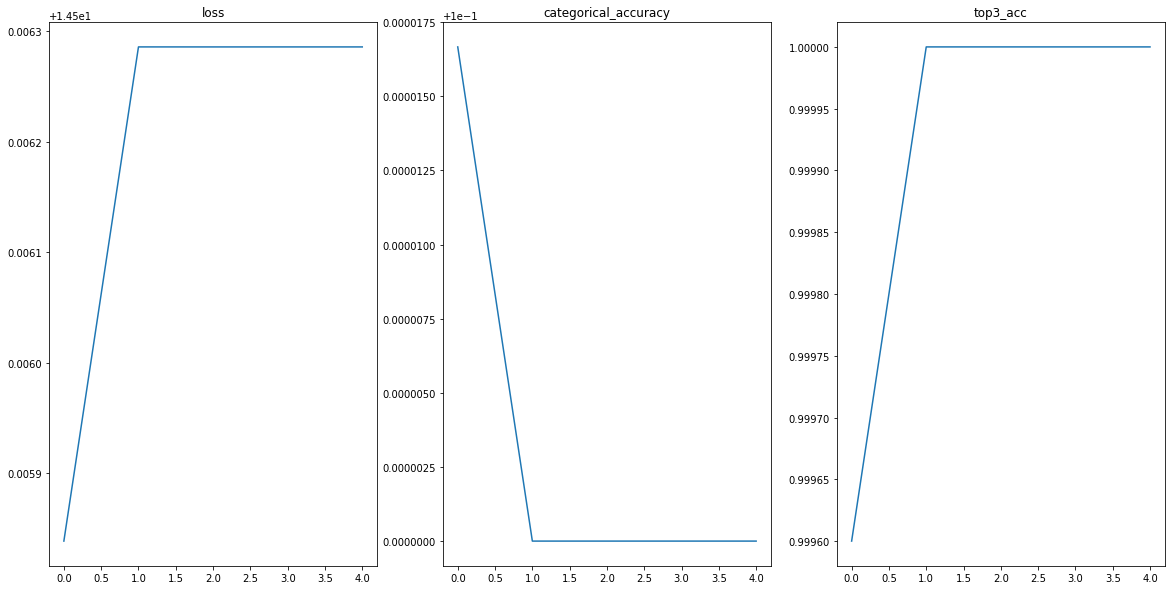

In [31]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = model.predict(X_test).argmax(axis=1)

print("Accuracy: ")

print(accuracy_score(predictions, y_test))

print("\n\n")

print("Confusion matrix: ")

print(confusion_matrix(predictions, y_test))

print("\n\n")

print(classification_report(predictions, y_test, target_names=Labels))

Accuracy: 
0.1



Confusion matrix: 
[[   0    0    0    0    0    0    0    0    0    0]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]



             precision    recall  f1-score   support

T-shirt/top       0.00      0.00      0.00         0
    Trouser       1.00      0.10      0.18     10000
   Pullover       0.00      0.00      0.00         0
      Dress       0.00      0.00      0.00         0
       Coat       0.00      0.00      0.00         0
     Sandal       0.00      0.00      0.00         0
      Shirt       0.00      0.00      0.00         0
    

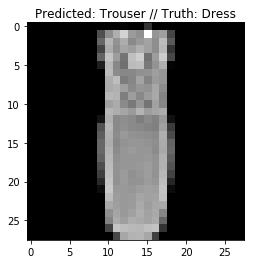

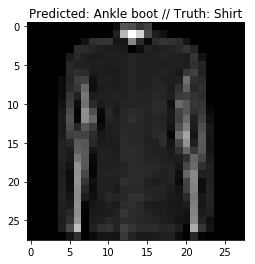

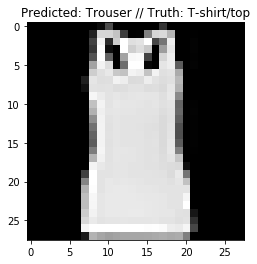

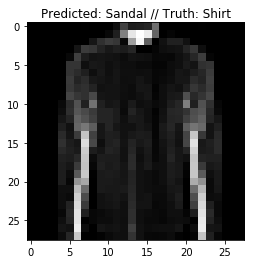

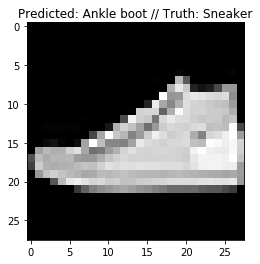

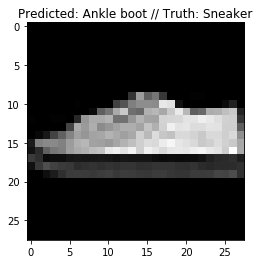

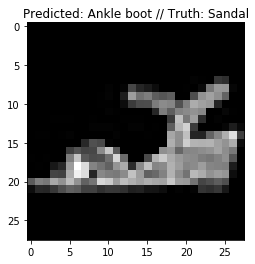

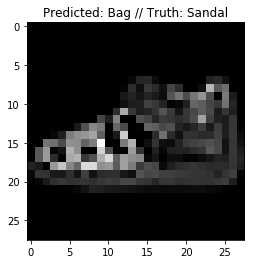

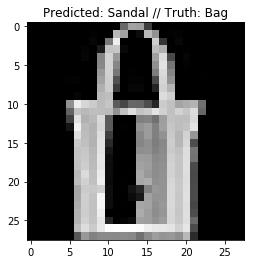

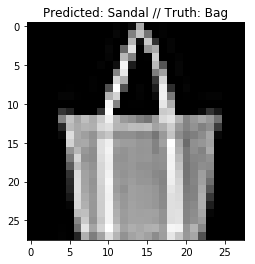

In [16]:
import random

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="gray")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))